In [117]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

## Visualization for Paper Used Monthly
We created a line chart to see the usage for each printer, as well as the sum of all of them over time, grouped by the month.

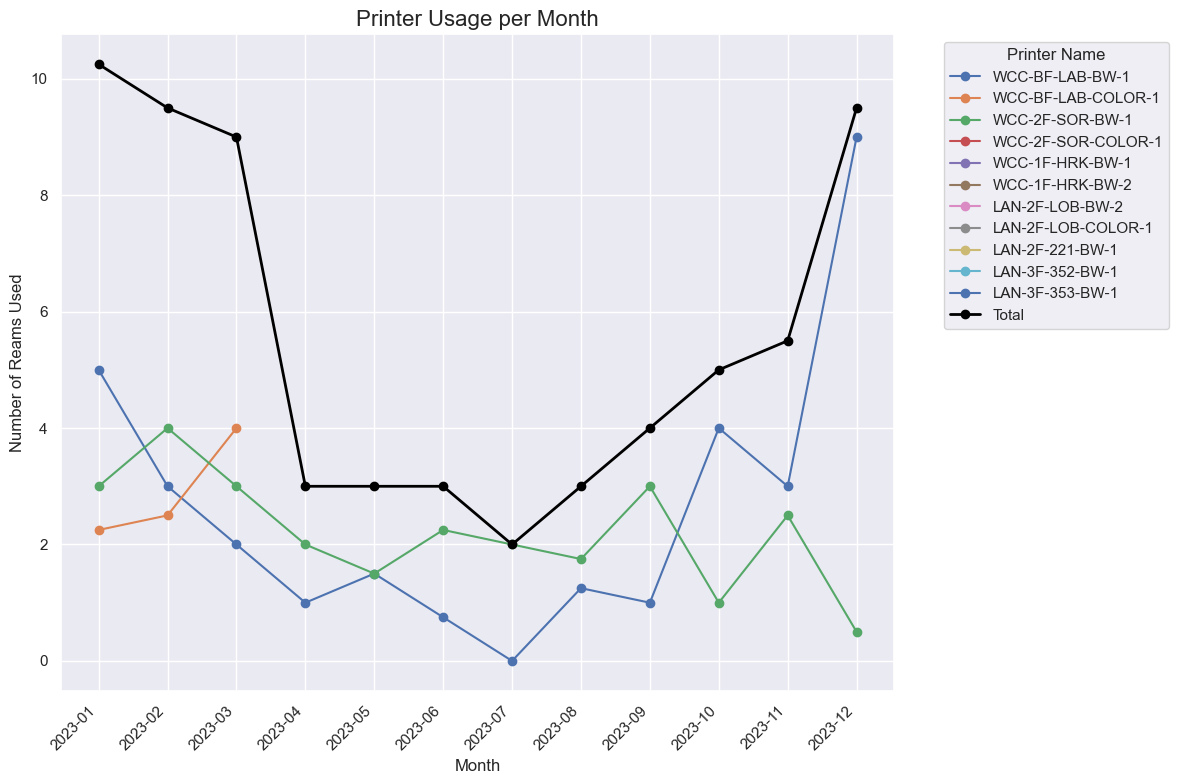

In [118]:
# List of printers
printer_list = ['WCC-BF-LAB-BW-1', 'WCC-BF-LAB-COLOR-1', 'WCC-2F-SOR-BW-1', 'WCC-2F-SOR-COLOR-1',
                'WCC-1F-HRK-BW-1', 'WCC-1F-HRK-BW-2', 'LAN-2F-LOB-BW-2', 'LAN-2F-LOB-COLOR-1',
                'LAN-2F-221-BW-1', 'LAN-3F-352-BW-1', 'LAN-3F-353-BW-1']

# Create a figure and axes
plt.figure(figsize=(12, 8))

# Plot all printers on the same axes
for p in printer_list:
    printer_data = df[df['Printer Name'] == p]
    
    printers = printer_data.groupby(df['Date'].dt.to_period("M"))['Number of Reams Used'].sum()
    plt.plot(printers.index.strftime('%Y-%m'), printers, marker='o', linestyle='-', label=p)

# Add the total sum of all the printers to the visualization
total_sum = df.groupby(df['Date'].dt.to_period("M"))['Number of Reams Used'].sum()
plt.plot(total_sum.index.strftime('%Y-%m'), total_sum, marker='o', linestyle='-', label='Total', linewidth=2, color='black')    
    

# Add labels and legend
plt.title('Printer Usage per Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Reams Used')
plt.grid(True)
plt.legend(title='Printer Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Use the same x-axis labels for all printers
plt.xticks(monthly_usage.index.strftime('%Y-%m'), rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Visualization for Paper Used Weekly
We created a line chart to see the usage for each printer, as well as the sum of all of them over time, grouped by the week.

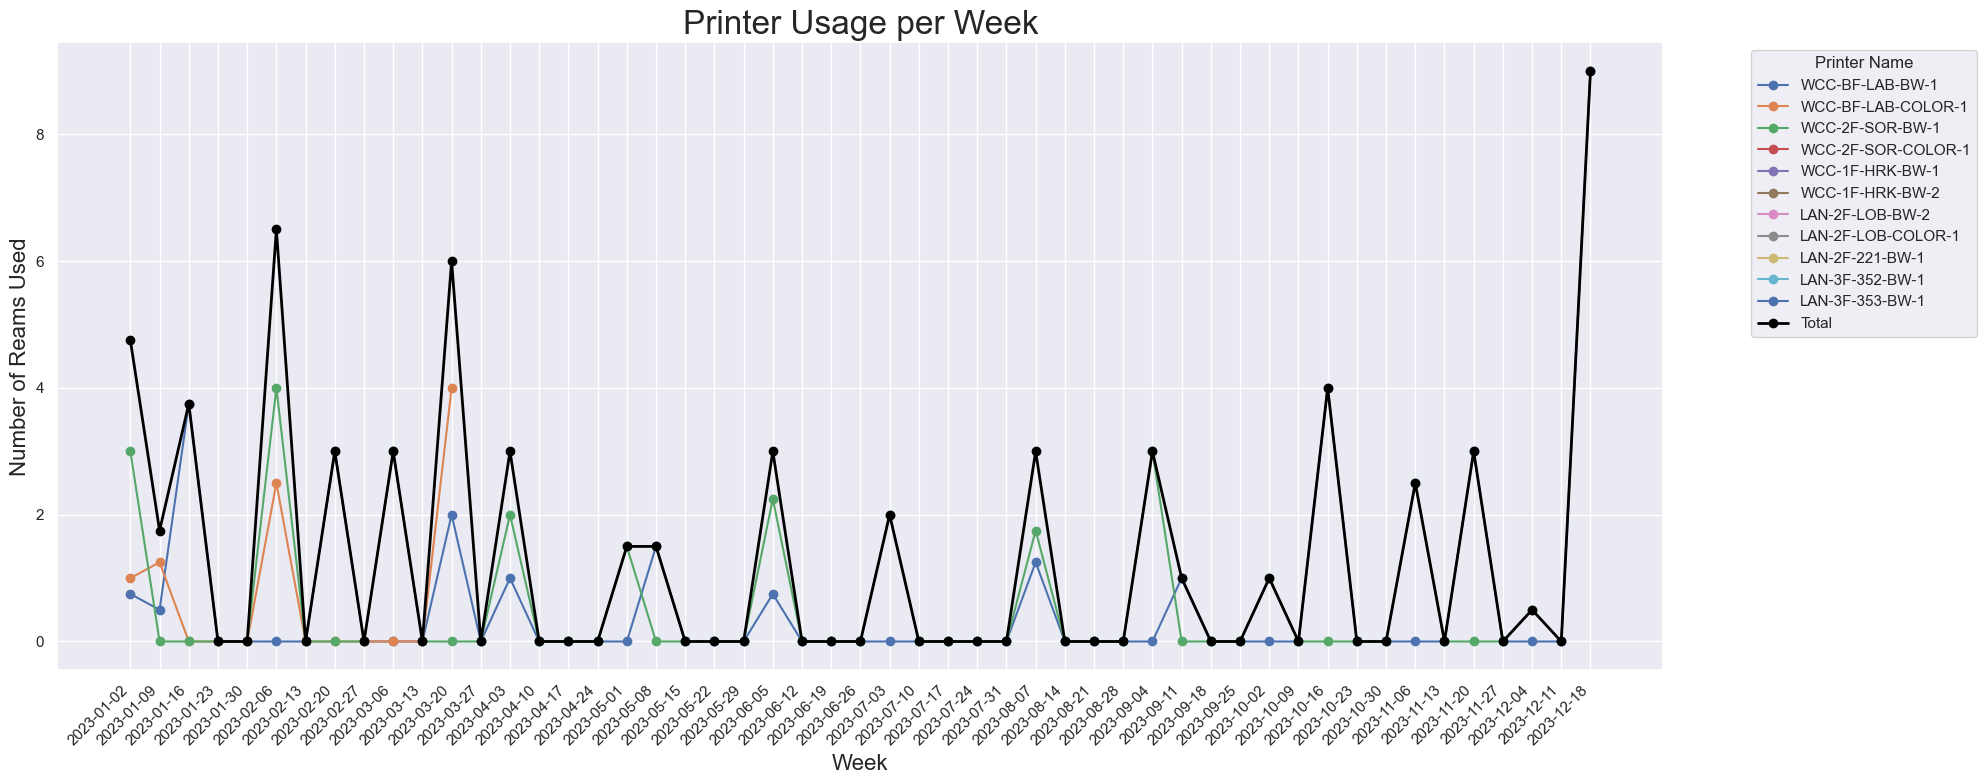

In [119]:
# Create a figure and axes
plt.figure(figsize=(20, 8))

# Plot all printers on the same axes
for p in printer_list:
    printer_data = df[df['Printer Name'] == p]
    
    # Adjust the resample rule based on your preference, 'W-Sun' for weeks starting from Sunday
    weekly_usage = printer_data.resample('W-Mon', on='Date')['Number of Reams Used'].sum()
    plt.plot(weekly_usage.index.strftime('%Y-%m-%d'), weekly_usage, marker='o', linestyle='-', label=p)

# Add the total sum of all the printers to the visualization
total_sum = df.resample('W-Mon', on='Date')['Number of Reams Used'].sum()
plt.plot(total_sum.index.strftime('%Y-%m-%d'), total_sum, marker='o', linestyle='-', label='Total', linewidth=2, color='black')    

# Add labels and legend
plt.title('Printer Usage per Week', fontsize=24)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Number of Reams Used', fontsize=16)
plt.grid(True)
plt.legend(title='Printer Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Use the same x-axis labels for all printers
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()